In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-dataset/train-images.idx3-ubyte
/kaggle/input/mnist-dataset/t10k-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images.idx3-ubyte
/kaggle/input/mnist-dataset/train-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte
/kaggle/input/mnist-dataset/train-labels-idx1-ubyte/train-labels-idx1-ubyte
/kaggle/input/mnist-dataset/train-images-idx3-ubyte/train-images-idx3-ubyte


# Struct Library to Unpack Image Data

In [2]:
import struct

def read_idx(filename):
    # Open the file in binary mode for reading
    with open(filename, 'rb') as f:
        # Read the first 4 bytes and unpack them
        # '>HBB' means: 
        # '>' - big-endian
        # 'H' - unsigned short (2 bytes)
        # 'B' - unsigned byte (1 byte)
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        
        # Read the dimensions of the data
        # '>I' means: 
        # '>' - big-endian
        # 'I' - unsigned int (4 bytes)
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        
        # Read the remaining bytes and interpret them as unsigned 8-bit integers (uint8)
        # Reshape the flat array into the shape specified by the header
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)


## Load the Dataset

In [3]:
def load_mnist(image_path, label_path):
    images = read_idx(image_path)
    labels = read_idx(label_path)
    return images, labels

train_image_path = '/kaggle/input/mnist-dataset/train-images-idx3-ubyte/train-images-idx3-ubyte'
train_label_path = '/kaggle/input/mnist-dataset/train-labels-idx1-ubyte/train-labels-idx1-ubyte'
test_image_path =  '/kaggle/input/mnist-dataset/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte'
test_label_path =  '/kaggle/input/mnist-dataset/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte'

In [4]:
train_images, train_labels = load_mnist(train_image_path, train_label_path)
test_images, test_labels = load_mnist(test_image_path, test_label_path)

# print the shapes
print(f'Train images shape: {train_images.shape}')
print(f'Train labels shape: {train_labels.shape}')
print(f'Test images shape: {test_images.shape}')
print(f'Test labels shape: {test_labels.shape}')

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [5]:
# Reshae the arrays
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

X_train = train_images_flat
y_train = train_labels
X_test = test_images_flat
y_test = test_labels

In [6]:
from collections import Counter

# Count the occurrences of each label in the y_train array using Counter
label_counts = Counter(y_train)

# Iterate over the items in the label_counts dictionary
for label, count in label_counts.items():
    # Print out the label and its corresponding count in a formatted string
    print(f"Label {label}: Count {count}")


Label 5: Count 5421
Label 0: Count 5923
Label 4: Count 5842
Label 1: Count 6742
Label 9: Count 5949
Label 2: Count 5958
Label 3: Count 6131
Label 6: Count 5918
Label 7: Count 6265
Label 8: Count 5851


## Disribution of samples in Training set

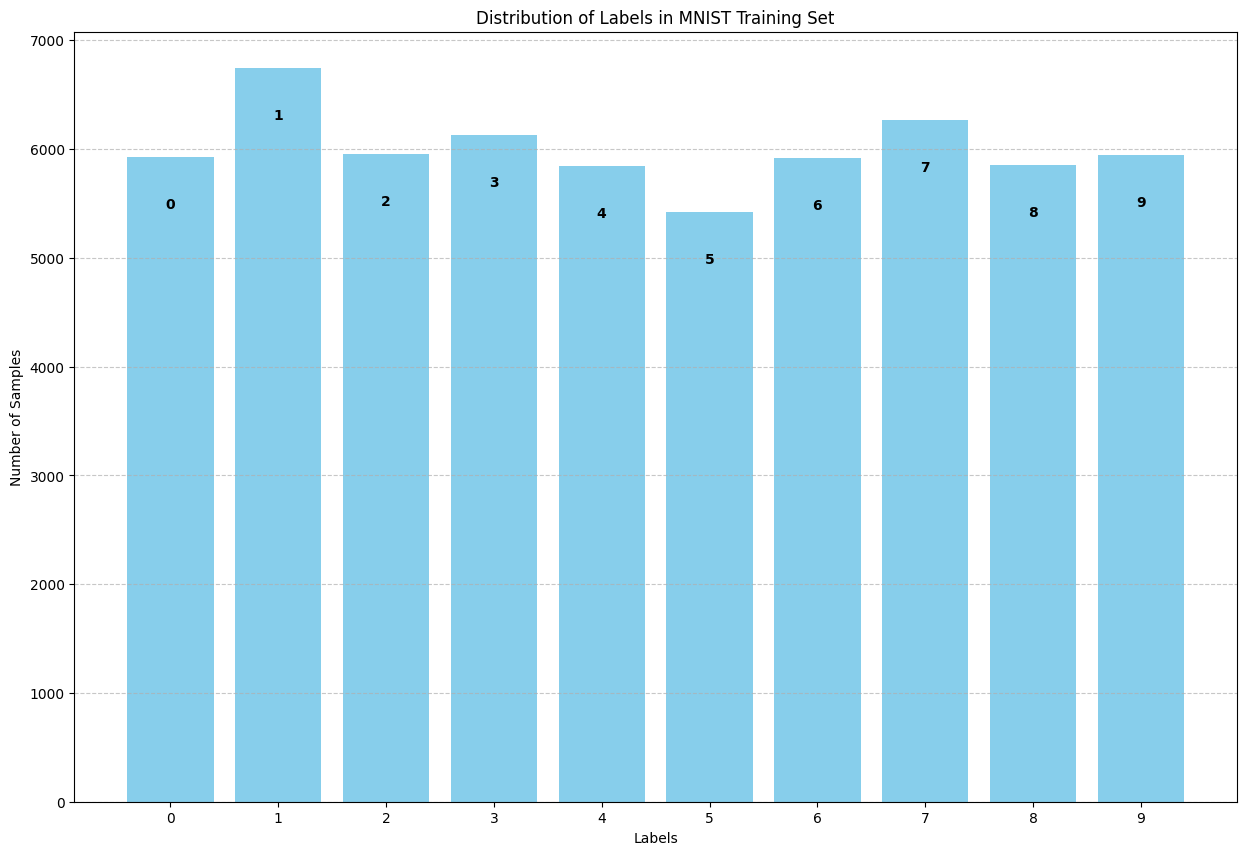

In [7]:
import matplotlib.pyplot as plt

# Get the unique labels and their counts
unique_labels, counts = np.unique(train_labels, return_counts=True)

# Create a bar chart
plt.figure(figsize=(15, 10))
bars = plt.bar(unique_labels, counts, color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Number of Samples')
plt.title('Distribution of Labels in MNIST Training Set')
plt.xticks(unique_labels)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars with labels (digits 0-9)
for bar, label in zip(bars, unique_labels):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 500, 
             f'{label}', ha='center', va='bottom', color='black', fontweight='bold')

# Show the plot
plt.show()

# Training Algorithms on the MNIST Dataset

In [8]:
from tabulate import tabulate

# Define accuracies for each model
accuracies = {
    "RandomForestClassifier": 97.01,
    "KNeighborsClassifier": 96.88,
    "SupportVectorMachine": 96.6,
    "MultiLayerPerceptron": 97.36,
    "LogisticRegression": 92.55,
    "XgboostClassifier": 97.95,
    "CNN": 99.23,
    "CNN with datagen": 99.9  # Manually added CNN with datagen
}

# Create the table using tabulate
table = tabulate(accuracies.items(), headers=["Model", "Accuracy (%)"], tablefmt="grid")

# Print the table
print(table)


+------------------------+----------------+
| Model                  |   Accuracy (%) |
+========================+================+
| RandomForestClassifier |          97.01 |
+------------------------+----------------+
| KNeighborsClassifier   |          96.88 |
+------------------------+----------------+
| SupportVectorMachine   |          96.6  |
+------------------------+----------------+
| MultiLayerPerceptron   |          97.36 |
+------------------------+----------------+
| LogisticRegression     |          92.55 |
+------------------------+----------------+
| XgboostClassifier      |          97.95 |
+------------------------+----------------+
| CNN                    |          99.23 |
+------------------------+----------------+
| CNN with datagen       |          99.9  |
+------------------------+----------------+
